## [Washington D.C Metro Area Crime Analysis]

### [PCPP21_Group 3 ] 


### [Ng Zhong Rong | Yeo Xiu Juan ]



### INTRODUCTION

Washington D.C has experienced violent crimes since 2008. Through, our analysis we would be able to provide an insightful and awareness and build a safer community to the resident in D.C.

### CONTENTS



Section 1: Data Preparation 

Section 2: Feature Engineering

Section 3: Hypotheses

Section 4: Interpretation of the Results

Section 5: Limitations and Future Directions

---


#### <u>Section 1: Data Preparation</u>



#1. Import libraries

#2. Remove unwanted columns 

#3. Check if the data contain NA values and drop columns that contain NA values.

#4. Gather news from websites to support the result of the analaysis.  


In [1]:
#import libraries, reading the files for usage.


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# df = pd.read_csv('Crime DB.csv', index_col=0)
df= pd.read_csv('C:\\Users\\joyce\\OneDrive\\SMU_Python\\Module 6 -Capstone Project Data Analysis\\dc_crime_add_vars.csv')



*You can intersperse markdown cells between your code cells for commentary.*

In [ ]:
# EDA

#Check data type, blanks and shape of dataframe.
df.info()
df.describe()
df.isna().sum()
df.shape
df.size
df.columns
df.head()



In [2]:
### Methods of handling Missing value for Null Values & NA Values

new_df = df.fillna(0) 

new_df.head()

new_df.isna().any()

Unnamed: 0              False
X                       False
REPORT_DAT              False
SHIFT                   False
OFFENSE                 False
METHOD                  False
BLOCK                   False
DISTRICT                False
PSA                     False
WARD                    False
ANC                     False
NEIGHBORHOOD_CLUSTER    False
BLOCK_GROUP             False
CENSUS_TRACT            False
VOTING_PRECINCT         False
CCN                     False
START_DATE              False
END_DATE                False
XBLOCK                  False
YBLOCK                  False
optional                False
date                    False
year                    False
month                   False
day                     False
hour                    False
minute                  False
second                  False
EW                      False
NS                      False
quad                    False
crimetype               False
dtype: bool

In [ ]:
#Re perform EDA on scrubbed data.

new_df.info()
new_df.shape
new_df.columns
new_df.nunique()


### Section 2. Feature Engineering¶
Convert 'Date' Dtype from [object] to pandas [datetime64[ns]]

In [3]:
new_df['day'] = pd.to_datetime(new_df['date'])
new_df.dtypes
new_df['day']

new_df["day_name"] = new_df['day'].dt.day_name()

# Retrive the month name from date & Add new column [mth_name] to existing column
new_df["Month_name"] = new_df['day'].dt.month_name()

new_df.head()

,Unnamed: 0,X,REPORT_DAT,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,...,day,hour,minute,second,EW,NS,quad,crimetype,day_name,Month_name
0,1,1,8/31/2008 8:47:00 PM,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,...,2008-08-31 20:47:00,20,47,0,West,North,Northwest,Non-Violent,Sunday,August
1,2,2,9/1/2008 0:45,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,...,2008-01-09 00:45:00,0,45,0,West,North,Northwest,Non-Violent,Wednesday,January
2,3,3,9/1/2008 3:00,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,...,2008-01-09 03:00:00,3,0,0,East,North,Northeast,Non-Violent,Wednesday,January
3,4,4,9/9/2008 7:46,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2.0,208.0,2,...,2008-09-09 07:46:00,7,46,0,West,North,Northwest,Non-Violent,Tuesday,September
4,5,5,8/24/2008 8:00:00 PM,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,1.0,102.0,2,...,2008-08-24 20:00:00,20,0,0,East,North,Northeast,Non-Violent,Sunday,August


In [4]:
## Remove unwanted columns

df_2 = new_df.drop(["Unnamed: 0","X","REPORT_DAT","SHIFT","METHOD","BLOCK","PSA","CCN","VOTING_PRECINCT","CENSUS_TRACT","START_DATE","END_DATE","optional","date"],axis=1,inplace=False)

In [5]:
## Retrive the data after removing the columns
df_2.head()

,OFFENSE,DISTRICT,WARD,ANC,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,XBLOCK,YBLOCK,year,month,day,hour,minute,second,EW,NS,quad,crimetype,day_name,Month_name
0,THEFT/OTHER,2.0,2,2E,Cluster 4,000300 1,-77.070209,38.913633,2008,8,2008-08-31 20:47:00,20,47,0,West,North,Northwest,Non-Violent,Sunday,August
1,MOTOR VEHICLE THEFT,2.0,2,2B,Cluster 6,005500 5,-77.045323,38.908564,2008,9,2008-01-09 00:45:00,0,45,0,West,North,Northwest,Non-Violent,Wednesday,January
2,THEFT/OTHER,1.0,2,2C,Cluster 8,005800 1,-77.027045,38.899057,2008,9,2008-01-09 03:00:00,3,0,0,East,North,Northeast,Non-Violent,Wednesday,January
3,THEFT/OTHER,2.0,2,2B,Cluster 6,005301 3,-77.040089,38.909638,2008,9,2008-09-09 07:46:00,7,46,0,West,North,Northwest,Non-Violent,Tuesday,September
4,MOTOR VEHICLE THEFT,1.0,2,2C,Cluster 8,005900 1,-77.019377,38.894573,2008,8,2008-08-24 20:00:00,20,0,0,East,North,Northeast,Non-Violent,Sunday,August


<Figure size 3600x360 with 0 Axes>

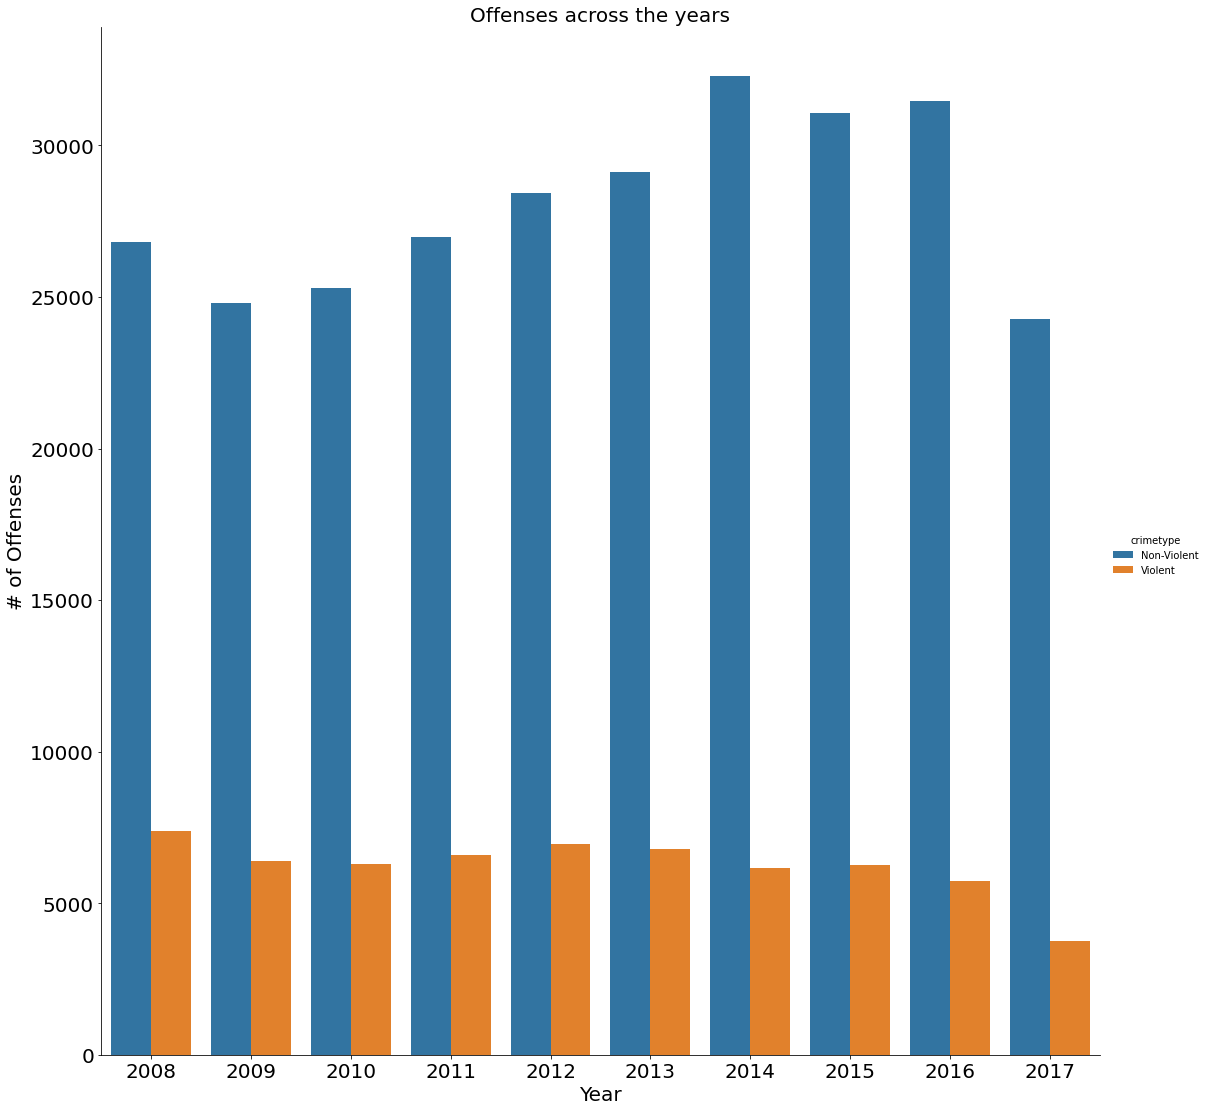

In [27]:
## virtualisation
#Get an overall landscape of the frequency and type of crimes committed btw 2008 & 2017
#Theft is the most freq crime committed. 

plt.figure(figsize=[50,5])


g5 = sns.catplot(x='year', hue='crimetype', data =new_df, kind = 'count', height = 15)
g5.set_axis_labels()

plt.title('Offenses across the years', fontdict={'fontsize': 20})
plt.xlabel('Year', fontdict={'fontsize': 20})
plt.ylabel('# of Offenses', fontdict={'fontsize': 20})
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.savefig('Overview of crime by year.png', bbox_inches='tight')

## Section 3 : Hypotheses 

### H1 : What crime type happens when its closer to Christmas  in the year 2008?

For H1, variables that will be used to analyse was 'Month' & 'offence','year =2008 ','crime Type  = Violent'.These variable choosen has no Null Value and empty cell.Therefore,cleaning for these variables was not needed.

X axis (Independant) : Month_name 

Y axis(Dependant) : Offence 

The visualisation tool applied was bar plot which is use to identify what was the type of crime that would happened when is closer to christmas.

--- FootNote ----

https://www.oxygen.com/homicide-for-the-holidays/blogs/its-the-most-dangerous-time-of-the-year-why-do-crimes-increase

In [28]:
### Extract necessary columns for analysing >>  year = 2008, Month_name , crime type = violent,offence

c_08 = df_2.loc[(df_2.crimetype =="Violent") & (df_2.year ==2008) & (df_2.Month_name)]


In [29]:
## Load the data for C_08
c_08

,OFFENSE,DISTRICT,WARD,ANC,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,XBLOCK,YBLOCK,year,month,day,hour,minute,second,EW,NS,quad,crimetype,day_name,Month_name
26,ROBBERY,3.0,2,2F,Cluster 7,004902 2,-77.025983,38.905643,2008,9,2008-09-17 22:15:00,22,15,0,East,North,Northeast,Violent,Wednesday,September
33,ROBBERY,3.0,2,2B,Cluster 6,005301 1,-77.037497,38.913351,2008,8,2008-08-24 20:20:00,20,20,0,West,North,Northwest,Violent,Sunday,August
42,ASSAULT W/DANGEROUS WEAPON,2.0,2,2B,Cluster 6,010700 2,-77.041828,38.906845,2008,7,2008-07-19 04:32:00,4,32,0,West,North,Northwest,Violent,Saturday,July
46,ASSAULT W/DANGEROUS WEAPON,3.0,2,2F,Cluster 8,010100 1,-77.027808,38.904201,2008,9,2008-09-09 04:00:00,4,0,0,East,North,Northeast,Violent,Tuesday,September
53,ASSAULT W/DANGEROUS WEAPON,3.0,2,2F,Cluster 8,010100 1,-77.027808,38.904201,2008,8,2008-08-24 07:25:00,7,25,0,East,North,Northeast,Violent,Sunday,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342841,ROBBERY,3.0,1,1B,Cluster 3,003400 1,-77.017460,38.916750,2008,2,2008-07-02 18:35:00,18,35,0,East,North,Northeast,Violent,Wednesday,July
342845,ROBBERY,3.0,1,1A,Cluster 2,003100 1,-77.024130,38.935230,2008,7,2008-07-22 22:00:00,22,0,0,East,North,Northeast,Violent,Tuesday,July
342848,ROBBERY,3.0,1,1B,Cluster 3,003500 2,-77.021990,38.920480,2008,8,2008-05-08 17:34:00,17,34,0,East,North,Northeast,Violent,Thursday,May
342852,ROBBERY,4.0,1,1A,Cluster 2,002801 1,-77.032730,38.933310,2008,1,2008-09-01 22:43:00,22,43,0,East,North,Northeast,Violent,Monday,September


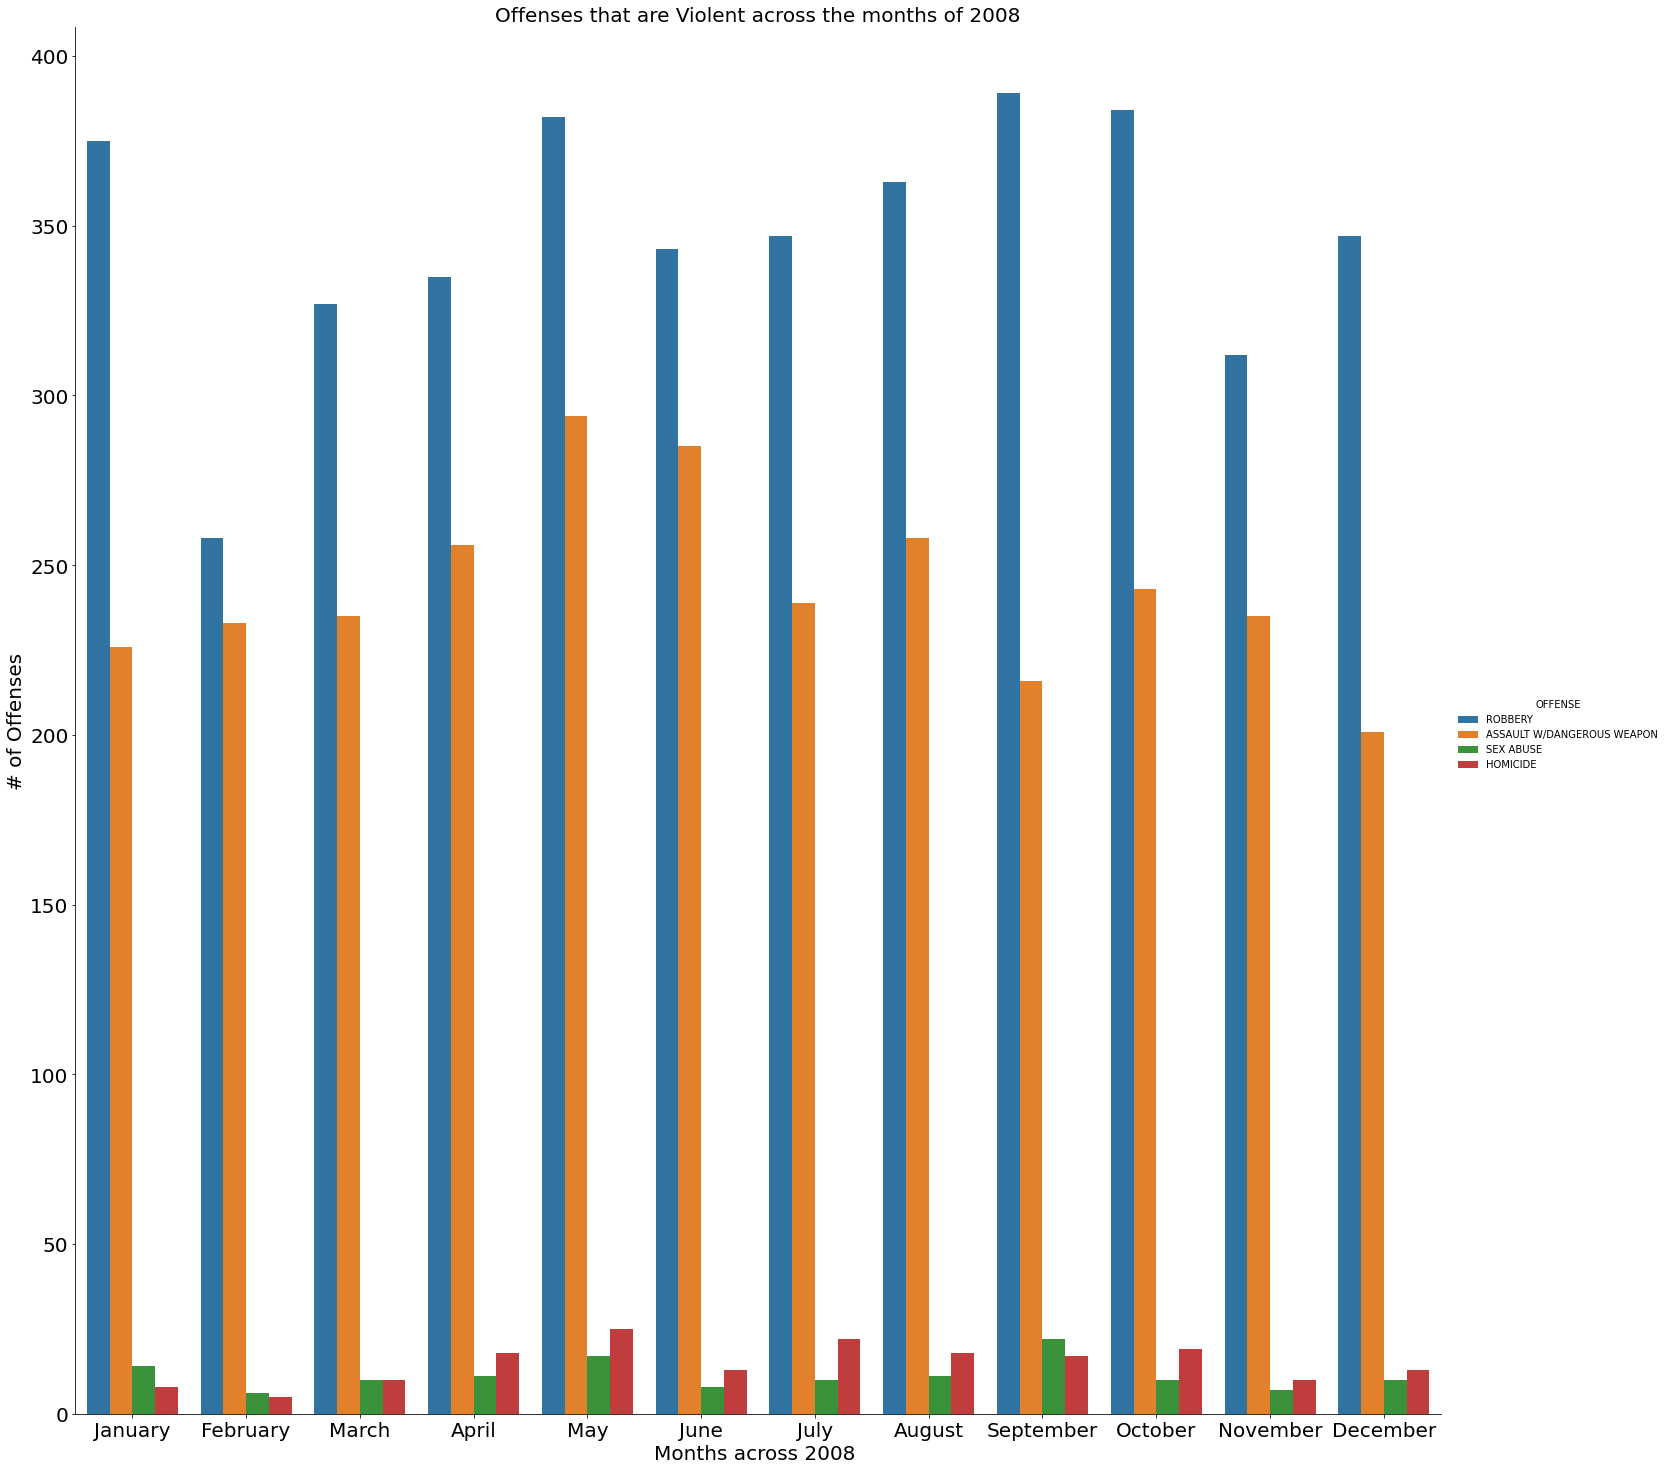

In [30]:
## ## virtualisation

g1 = sns.catplot(x='Month_name', hue='OFFENSE',  data = c_08, kind = 'count', height = 20, order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] )

g1.set_axis_labels()

plt.title('Offenses that are Violent across the months of 2008', fontdict={'fontsize': 20})
plt.xlabel('Months across 2008 ', fontdict={'fontsize': 20})
plt.ylabel('# of Offenses', fontdict={'fontsize': 20})
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.savefig('Overview of Offenses that are Violent across the months of 2008 .png', bbox_inches='tight')

### H2 : Does sex abuse happen during late afternoon ?


For H2, Four variables used was 'XBlock', 'YBlock' ,'offence == sex abuse' & 'hour' (2pm-5pm) & 'ward '.

X axis (Independant) : longtitude > ( X Block) , hours (14-17) , ward 

Y axis (Dependant) : latitude > (Y Block) , offence == sex abuse, year = 2008

The visualisation tool apply using folium packages

In [16]:
### Extract necessary columns for analysing >>  year = 2008, crime type = violent,offence = Sex Abuse , hours = 2pm-5pm

c_08_1 = df_2.loc[(df_2.crimetype =="Violent") & (df_2.year ==2008) & (df_2.OFFENSE =="SEX ABUSE") & df_2.hour.isin(range(14,18))]

In [17]:
c_08_1

,OFFENSE,DISTRICT,WARD,ANC,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,XBLOCK,YBLOCK,year,month,day,hour,minute,second,EW,NS,quad,crimetype,day_name,Month_name
397,SEX ABUSE,2.0,2,2E,Cluster 4,000201 1,-77.074958,38.912603,2008,8,2008-04-08 15:00:00,15,0,0,West,North,Northwest,Violent,Tuesday,April
1813,SEX ABUSE,2.0,2,2A,Cluster 5,005600 1,-77.053304,38.903082,2008,12,2008-12-29 17:30:00,17,30,0,West,North,Northwest,Violent,Monday,December
40838,SEX ABUSE,2.0,2,2A,Cluster 5,010800 1,-77.044188,38.900448,2008,8,2008-08-21 16:00:00,16,0,0,West,North,Northwest,Violent,Thursday,August
61427,SEX ABUSE,2.0,2,2E,Cluster 4,000300 3,-77.073449,38.913550,2008,1,2008-01-13 14:45:00,14,45,0,West,North,Northwest,Violent,Sunday,January
74029,SEX ABUSE,2.0,3,3G,Cluster 10,001100 1,-77.073625,38.961546,2008,10,2008-10-20 16:00:00,16,0,0,West,North,Northwest,Violent,Monday,October
80797,SEX ABUSE,4.0,4,4D,Cluster 18,002201 2,-77.024560,38.949054,2008,7,2008-07-30 16:05:00,16,5,0,East,North,Northeast,Violent,Wednesday,July
80909,SEX ABUSE,4.0,4,4C,Cluster 18,002301 2,-77.014557,38.942182,2008,8,2008-01-08 15:30:00,15,30,0,East,North,Northeast,Violent,Tuesday,January
100689,SEX ABUSE,4.0,4,4B,Cluster 17,001901 1,-77.021173,38.962000,2008,12,2008-10-12 14:00:00,14,0,0,East,North,Northeast,Violent,Sunday,October
155252,SEX ABUSE,5.0,5,5D,Cluster 23,008802 2,-76.987100,38.902005,2008,4,2008-04-18 16:00:00,16,0,0,East,North,Northeast,Violent,Friday,April
157724,SEX ABUSE,5.0,6,6C,Cluster 25,010600 1,-76.995538,38.905024,2008,10,2008-10-28 16:30:00,16,30,0,East,North,Northeast,Violent,Tuesday,October


<Figure size 3600x360 with 0 Axes>

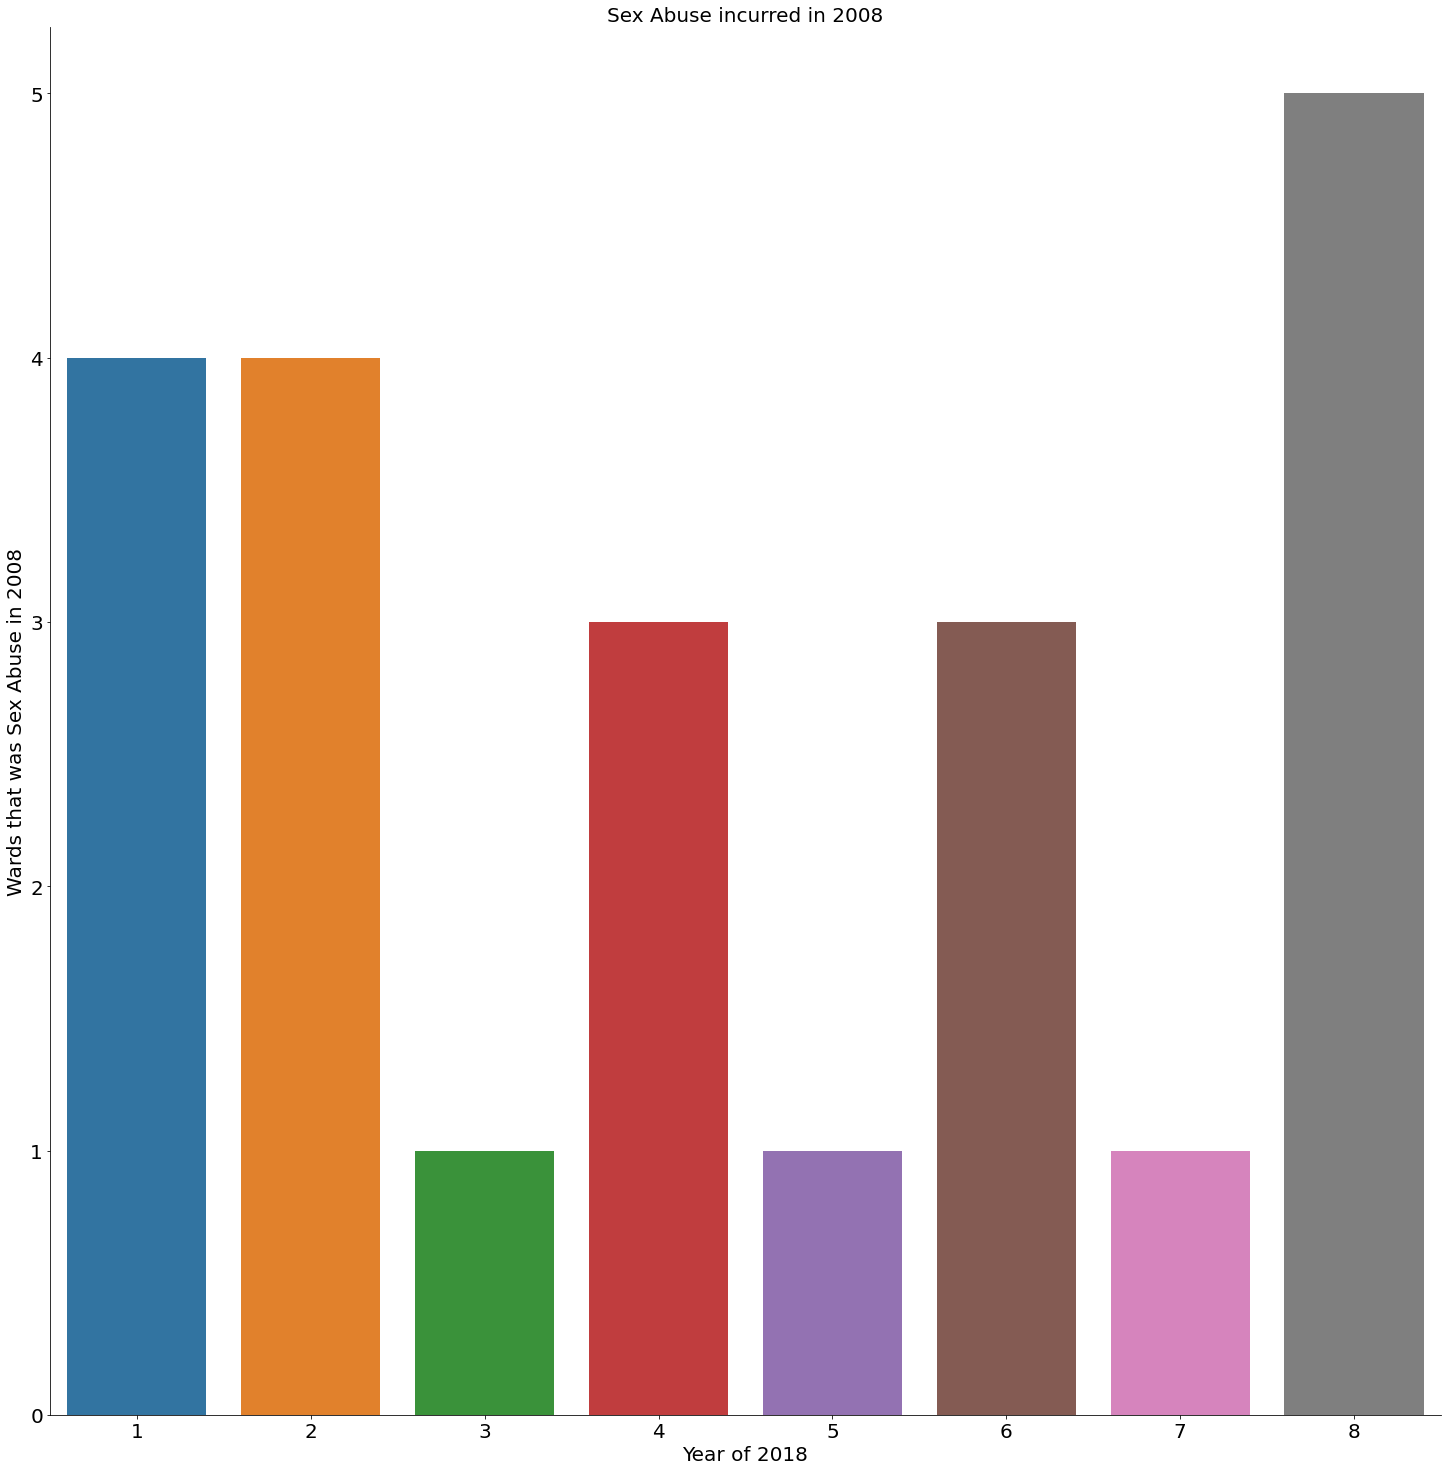

In [18]:
## virtualisation

plt.figure(figsize=[50,5])

g2 = sns.catplot(x='WARD', data =c_08_1, kind = 'count', height = 20)


g2.set_axis_labels()

plt.title('Sex Abuse incurred in 2008', fontdict={'fontsize': 20})
plt.xlabel('Year of 2018', fontdict={'fontsize': 20})
plt.ylabel('Wards that was Sex Abuse in 2008', fontdict={'fontsize': 20})
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.savefig('Overview of the Wards that was Sex Abuse in 2008.png', bbox_inches='tight')

In [19]:
## Visualisation by using folium liabraries and plot the wards using folium map

# install packages folium

! pip install folium


In [20]:
# import folium
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [21]:
# Create a map using the lon and lat in Washington DC.

m_1 = folium.Map(location=[38.89511,-77.03637], tiles='openstreetmap', zoom_start=10)

In [22]:
# Display the map

m_1


In [23]:
## Add Points to the map

for i in range(0,len(c_08_1)):
    folium.Marker(
      location=[c_08_1.iloc[i]['YBLOCK'], c_08_1.iloc[i]['XBLOCK']],
      popup=c_08_1.iloc[i]['WARD'],
   ).add_to(m_1)


In [26]:
# Display the map

m_1



### H3 : Does gun crime increase over the weekends ?


For H3,variables used was 'day_name', 'Shift' ,'year' & 'Method'.

X axis (Independant) :  day_name

Y axis (Dependant) :  Method = gun 

The visualisation tool apply using bar plot.

In [31]:
df_gun = new_df.loc[((new_df['crimetype'] == 'Violent') & (new_df['year'] == 2008) & (new_df['METHOD'] == 'GUN')), ['WARD', 'SHIFT', 'OFFENSE', 'METHOD', 'crimetype','XBLOCK', 'YBLOCK', 'year', 'day_name']]
df_gun


,WARD,SHIFT,OFFENSE,METHOD,crimetype,XBLOCK,YBLOCK,year,day_name
26,2,EVENING,ROBBERY,GUN,Violent,-77.025983,38.905643,2008,Wednesday
33,2,EVENING,ROBBERY,GUN,Violent,-77.037497,38.913351,2008,Sunday
95,2,MIDNIGHT,ROBBERY,GUN,Violent,-77.069205,38.911684,2008,Friday
164,2,EVENING,ROBBERY,GUN,Violent,-77.025989,38.909645,2008,Wednesday
249,2,MIDNIGHT,ROBBERY,GUN,Violent,-77.035547,38.910379,2008,Sunday
...,...,...,...,...,...,...,...,...,...
342767,1,MIDNIGHT,ROBBERY,GUN,Violent,-77.024290,38.922380,2008,Wednesday
342838,1,EVENING,ASSAULT W/DANGEROUS WEAPON,GUN,Violent,-77.039000,38.923160,2008,Thursday
342845,1,EVENING,ROBBERY,GUN,Violent,-77.024130,38.935230,2008,Tuesday
342852,1,EVENING,ROBBERY,GUN,Violent,-77.032730,38.933310,2008,Monday


<Figure size 3600x360 with 0 Axes>

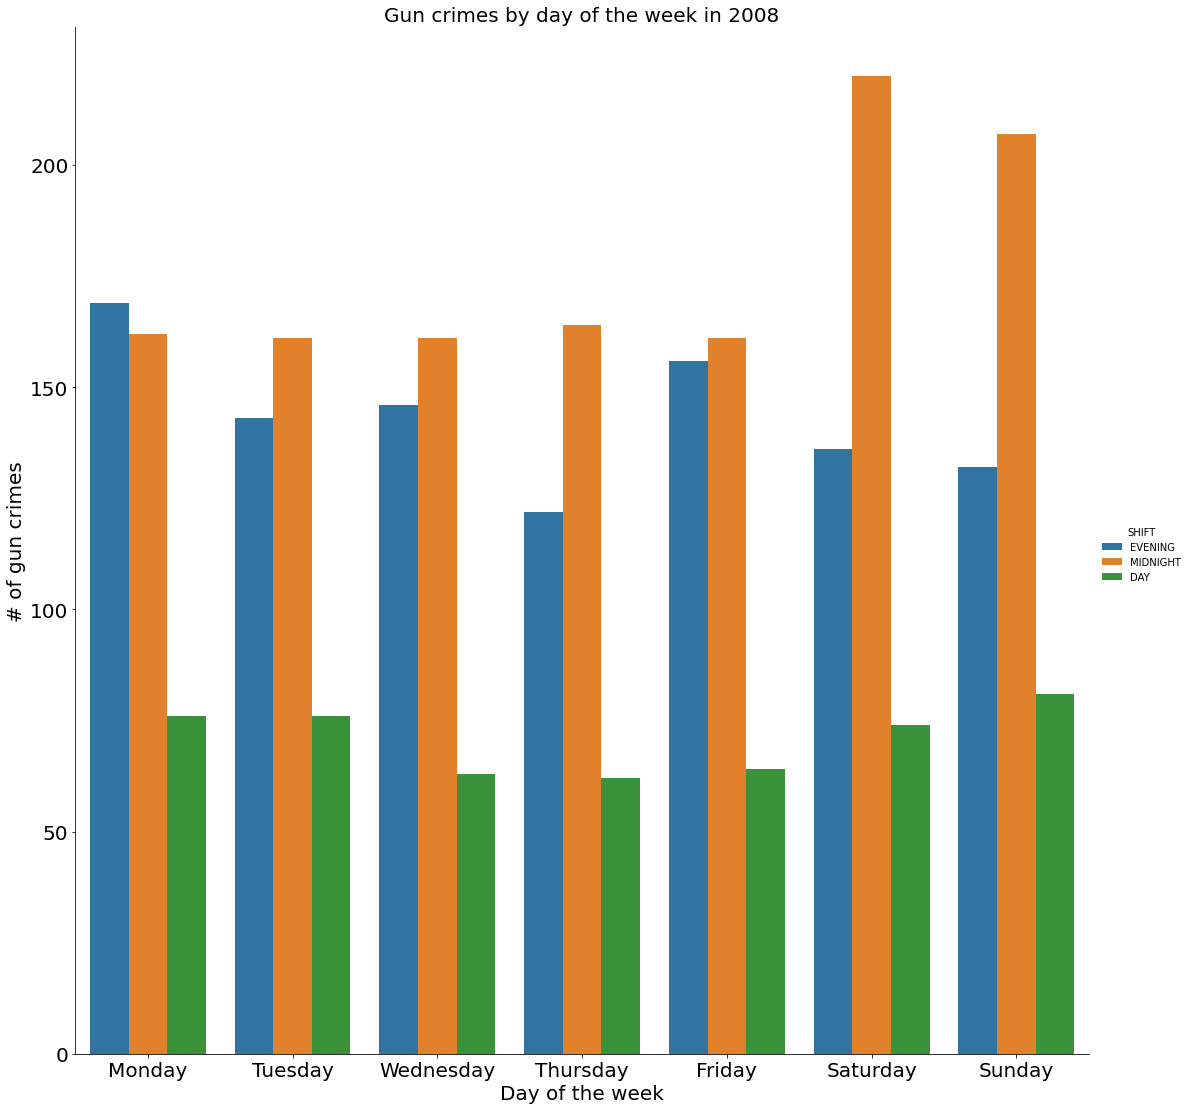

In [32]:
## virtualisation

plt.figure(figsize=[50,5])


g6 = sns.catplot(x='day_name', hue = 'SHIFT', data =df_gun, kind = 'count', height = 15, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])
g6.set_axis_labels()

plt.title('Gun crimes by day of the week in 2008', fontdict={'fontsize': 20})
plt.xlabel('Day of the week', fontdict={'fontsize': 20})
plt.ylabel('# of gun crimes', fontdict={'fontsize': 20})
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.savefig('H3 Gun crime.png', bbox_inches='tight')


---

## Section 4 : Interpretation of the Results

H1: During Christmas season of year 2008, Roberry has the highest number of crime. 

According to the psychological assocation, one of the factors that lead people to commit roberries was stress.
 
People tends to experience more mental stress during holidays because they would want to give gifts to their family members or friends over the holiday season.


We would suggest that more incentives or tax allowance to be given to the low income families in D.C that would probably lower the number of robberries case in DC.


H2 : During late afternoon,residence located at ward 8 has the highest number of sex abuse.

One of the reasons that lead people to commit suc crime was they will feel more power and control.

We would suggest social committee to reach out to the residence in ward 8 to improve their mental well-being.


H3: As per the data, weekends has increased in gun crime especially in wee hours. There isn't strong gun policy in US.

More police officers could patrol the wards during midnight so to bring a more safer communities to the residence in D.C



## Section 5: Limitations and Future Directions


As a beginner in python, we ackowledged that our work has more to improve on.

Due to the time constraints and the lack of computer science knowledge, we are unable to explore more interesting visualisation tool such as ARCsGIS, calendar heatmap to present our analysis.

From the programme, we have to build a foundation in python programming and would contiune to strengthen our knowledege and apply the skills to our work.

Lastly, we would like to thank all the lectures and TAs that have supported us to complete this project.

---